# NEAREST NEIGHBORS

#### LOAD THE DEPENDANCIES

In [206]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import set_printoptions

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os
import sys
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score

from scipy import stats
import seaborn as sns
import math



In [207]:
#### KNN Classifier

def KNN(k,X_train,y_train,X_test,y_test):
    """KNN algorithm"""
    global classifier
    
    f1_scores=[]
    accur=[]
    preci=[]
    recall=[]
    for i in k:
        
        # Define KNN Model
        classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto',
                                           leaf_size=30, p=3, metric='minkowski',metric_params=None)
        # Fit Model
        classifier.fit(X_train,y_train)

        y_pred = classifier.predict(X_test)
        
        y_prob=classifier.predict_proba(X_test)
        
        y_prob=y_prob[:,1]
        
        f1,a,p,r=metrics(y_test, y_pred)
        
        f1_scores.append(f1)
        accur.append(a)
        preci.append(p)
        recall.append(r)
        
    print('\n','f1_scores: ',f1_scores)
    print('accuracy: ',accur)
    
    return f1_scores,accur,preci,recall,y_pred,y_prob
        
        

In [208]:
#### Evaluate Model

def metrics(y_test, y_pred):
    """Confusion matrix and associated metrics"""
    matrix = confusion_matrix(y_test, y_pred)
    y_test=y_test.values.reshape(y_test.size)
#     tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
    precision=precision_score(y_test,y_pred,average=None)
    recall=recall_score(y_test,y_pred,average=None)
    f1=f1_score(y_test,y_pred,average=None)
    accuracy=accuracy_score(y_test,y_pred)
#     print('Confusion matrix breakdown:',('tn:',tn,'fp:',fp,'fn:',fn,'tp:',tp),'\n')
    print('Confusion matrix:\n', matrix)
    confusion_matrix_plot(matrix)
    print('Precision: When it predicts yes, how often is it correct?:',precision)
    print('Recall.True Positive Rate: When it\'s actually yes, how often does it predict yes?:',recall)
    print('F1:score is the harmonic average of the precision and recall,:',f1)
    print('Accuracy.Overall, how often is the classifier correct?: ',accuracy)
    print('Misclassification Rate.Overall, how often is it wrong?: ',(1-accuracy))

    return (f1,accuracy,precision,recall)
    


In [209]:
def confusion_matrix_plot(matrix):
    cm=matrix
    print(classes)
    fig, ax = plt.subplots()
    cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           title="confusion",
           ylabel='True label',
           xlabel='Predicted label')



    # Loop over data dimensions and create text annotations.
    normalize=False
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()



    plt.show()

#### PREPROCESSING: Replacing zeros where it is not a valid value for that feature.
##### This done here by replacing the zero values with a NAN, then replacing the NAN with the average value for non-zero values in that column

In [210]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset


#### PREPROCESSING: Split the dataset

In [211]:
def split_the_dataset(dataset,input_headers,target_header):
    
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

#### PREPROCESSING: Quick look at the features

In [212]:
def quick_feature_view(X):
    

    # X.hist(bins=50,figsize=(15,15))
    # X.plot(kind='hist',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))

    headers=X.columns.tolist()
    fig, axes = plt.subplots(nrows=1, ncols=len(headers), figsize=(20, 10))
    print(headers)
    for i,head in enumerate(headers,0):

        axes[i].hist(x=X[head],bins=50,edgecolor='black')
        axes[i].set(title=head)
        axes[i].grid()

    plt.show()

    X.plot(kind='density',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))
    plt.show()

#### PREPROCESSING:Target Summary

In [213]:
def target_summary(dataset,target_header):
    """PREPROCESSING:Target Summary"""
    print(dataset.groupby(target_header).size())
    print((dataset.groupby(target_header).size()/len(y)*100))


#### PREPROCESSING:Train - Test Split of the data

In [214]:
def split_the_train_test_data(X,y):
    
    """PREPROCESSING:Train - Test Split of the data"""
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.20,random_state=42,shuffle=True)
    X_train.head()
    
    return X_train,X_test,y_train,y_test

#### PREPROCESSING: Feature Scaling

In [215]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    return X_train, X_test



#### Model Parameters:Choose a value of k by taking the sqrt of the number of data points

In [216]:
def select_k_value(y_test,list_or_single):
    
    y_test.size
    
    if (list_or_single.lower()=='s'):
        k=round(math.sqrt(y_test.size))
        
        if (k%2==0):
            k_list=[]
            k_list.insert(0,k-1)
            k_list.insert(1,k+1)
            k=k_list
    else:
        k=[3,5,7,9,11,13,15,17,19,21]
        
    print ('Selected k value(s):\n',k)
    return k
    

In [217]:
def plot_the_metrics(f1_scores,accur,preci,recall):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),sharex='none')
    axes[0,0].plot(k,f1_scores,marker='o')
    axes[0,1].plot(k,accur,marker='o')
    axes[0,0].set(title='F1 Score')
    axes[0,1].set(title='Accuracy')
    axes[0,0].set(xlabel='K value')
    axes[0,1].set(xlabel='K value')
#     axes[0,0].set(xlim=(3,21), ylim=(0,1))
#     axes[0,1].set(xlim=(3,21), ylim=(0,1))
    axes[0,0].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[0,1].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[0,0].grid()
    axes[0,1].grid()

    axes[1,0].plot(k,preci,marker='o')
    axes[1,1].plot(k,recall,marker='o')
    axes[1,0].set(title='Precision')
    axes[1,1].set(title='Recall')
    axes[1,0].set(xlabel='K value')
    axes[1,1].set(xlabel='K value')
#     axes[1,0].set(xlim=(3,21), ylim=(0,1))
#     axes[1,1].set(xlim=(3,21), ylim=(0,1))
    axes[1,0].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[1,1].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[1,0].grid()
    axes[1,1].grid()

    plt.show()

In [218]:
def box_plot_the_metrics(f1_scores,accur,preci,recall):
    """Box plots for the classification metrics over a range of parameter adjustments"""
    
    f=np.asarray(f1_scores)
    a=np.asarray(accur)
    p=np.asarray(preci)
    r=np.asarray(recall)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
#     axes.boxplot([f,a,p,r])
    axes.boxplot(a)
    axes.set_xticklabels(['accuracy'])
#     axes.set_xticklabels(['f1_score','accuracy','precision','recall'])
    plt.grid()
    
    plt.show()
    

In [219]:
def plot_of_data_space(dataset,data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)
    
   
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')
    g=plt.scatter(xx_1[y==2],xx_2[y==2],color='g') 
    bl=plt.scatter(xx_1[y==3],xx_2[y==3],color='black')
    
    
#     for i in range(0,len(xx_1)):
#         print(y[i])
#         if (y[i]==0):
#             a=plt.scatter(xx_1[i],xx_2[i],marker='o',color='blue',s=30)
#         if (y[i]==1):
#             b=plt.scatter(xx_1[i],xx_2[i],marker='o',color='red',s=30)
#         if (y[i]==2):
#             c=plt.scatter(xx_1[i],xx_2[i],marker='o',color='green',s=30)
#         if (y[i]==3):
#             d=plt.scatter(xx_1[i],xx_2[i],marker='o',color='black',s=30)
        
#     plt.xlabel(f1);plt.ylabel(f2);
#     plt.legend((a,b),tuple(np.unique(labels)))

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])

    plt.grid()
    plt.legend((b,r,g,bl),tuple(np.unique(labels)))
    plt.show()


In [220]:
def boundary_decision_plot(X,y,X_train,y_train,x_test,y_pred,y_prob):
    
    X_unscaled=X.values
    X_scaled, dummy=feature_scaling(X_unscaled,X_test=1)
    xx_1=pd.DataFrame(X_train[:,0]) 
    xx_2=pd.DataFrame(X_train[:,1]) 
    y=pd.DataFrame(y_train.values)
    
#     print(y_train[0:5])
#     print(X_train[0:5])

    xx_test_1=pd.DataFrame(x_test[:,0]) 
    xx_test_2=pd.DataFrame(x_test[:,1])

    y_predict=pd.DataFrame(y_pred) 
    y_prob=pd.DataFrame(y_prob) 

    cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])

#     cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])

    h=.02

#     Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
#     x1=X_train[:,0] 
    x1=X_scaled[:,0]
    x2=X_scaled[:,1] 
    x_min,x_max = x1.min()-1,x1.max()+1 
    y_min,y_max = x2.min()-1,x2.max()+1 
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


    the_predict=classifier.predict(np.c_[xx.ravel(),yy.ravel()])

#     Put the result into a color plot
    Z = the_predict.reshape(xx.shape) 
    plt.figure(figsize=(15,15)) 
    plt.xlim(xx.min(),xx.max()) 
    plt.ylim(yy.min(),yy.max())

    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#     plt.scatter(xx_1[y==0],xx_2[y==0],color='b',marker='o') 
#     plt.scatter(xx_1[y==1],xx_2[y==1],color='r',marker='o')
    

#     plt.scatter(X_train[:,0],X_train[:,1],s=40,c=y_train,cmap=plt.cm.Spectral)
    cm=plt.cm.get_cmap('RdYlBu_r')

#     plt.scatter(xx_test_1[y_predict==0],xx_test_2[y_predict==0],cmap=cm,vmin=0,vmax=1,c=y_predict,marker='D') 
#     plt.scatter(xx_test_1[y_predict==1],xx_test_2[y_predict==1],cmap=cm,vmin=0,vmax=1,c=y_predict,marker='D') 
    plt.scatter(xx_test_1[y_predict==0],xx_test_2[y_predict==0],cmap=cm,vmin=0,vmax=1,c=y_prob,marker='D') 
    plt.scatter(xx_test_1[y_predict==1],xx_test_2[y_predict==1],cmap=cm,vmin=0,vmax=1,c=y_prob,marker='D') 
    plt.colorbar()


    plt.grid() 
    plt.show()


In [221]:
def max_results(f1_scores,accur,preci,recall,k):
    
    f=np.asarray(f1_scores)
    a=np.asarray(accur)
    p=np.asarray(preci)
    r=np.asarray(recall)
    k=np.asarray(k)
    
    results=f"""\n
    The max F1 SCORE is {round((f.max()*100),1)}% with a K value of {k[np.argmax(f)]}\n
    The max ACCURACY is {round((a.max()*100),1)}% with a K value of {k[np.argmax(a)]}\n
    The max PRECISION is {round((p.max()*100),1)}% with a K value of {k[np.argmax(p)]}\n
    The max RECALL is {round((r.max()*100),1)}% with a K value of {k[np.argmax(r)]}
    """
    
    print(results)
    
    
    
    
    

In [222]:
def label_encoding(dataset,input_headers):
    
    for i in input_headers:
        
        the_data_type=dataset[i].dtype.name
        if (the_data_type=='object'):
            lable_enc=preprocessing.LabelEncoder()
            lable_enc.fit(dataset[i])
            labels=lable_enc.classes_   #this is an array
            labels=list(labels) #converting the labels array to a list
            print(labels)
            dataset[i]=lable_enc.transform(dataset[i])

            return labels
    
        else:
            return list(np.unique(dataset[i]))
    

# MAIN PROGRAM

In [223]:
if __name__ == "__main__":
    
    global classifier, classes
    
#     RETRIEVE THE DATASET

#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/stock/stock_data.csv'
    
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/iris_/iris_data.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/0529_/0529_pass_rush.csv'
#     location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/titan/titantic_1.csv'
    location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
    dataset=pd.read_csv(location)

    print(dataset.info())
    print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35

In [224]:
    # Replace zeros with the mean where needed.
    rz=input('Do you need to replace any zeros in the dataset?')
    if (rz.lower()=='y'):
        the_headers=['Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
        dataset=replacing_zeros(dataset,the_headers)
        dataset.head()

Do you need to replace any zeros in the dataset?y


### Selecting inputs and targets

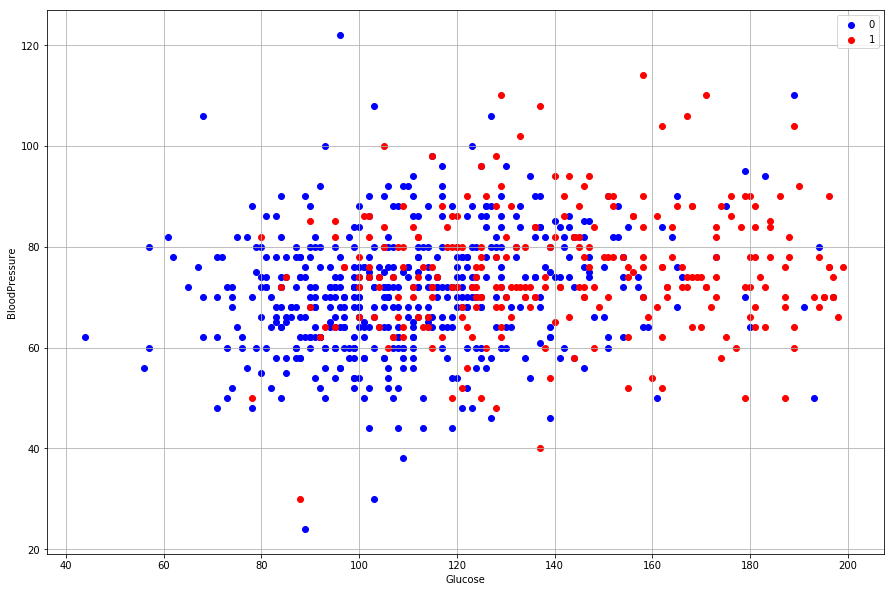

   Glucose  BloodPressure
0    148.0           72.0
1     85.0           66.0
2    183.0           64.0
3     89.0           66.0
4    137.0           40.0


In [225]:
    #Selecting inputs and targets
    
    
    target_header=['Outcome']
    input_headers=['Glucose','BloodPressure']
#     input_headers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


#     target_header=['GL_Success']
#     input_headers=['+2sigma_OUT','-2sigma_OUT']
    
#     target_header=['Species']
#     input_headers=['Length','Width']
    
#     target_header=['Survived']
#     input_headers=['Parch','Fare','SibSp','Age','Pclass','Sex','Ticket']

#     target_header=['play_type']
#     input_headers=['down','ydstogo']
#     input_headers=['game_seconds_remaining','yardline_100']

#     target_header=['Species']
#     input_headers=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
    
    target_label=label_encoding(dataset,target_header)
    
    classes=target_label
    test_label=label_encoding(dataset,input_headers)
#     print(test_label)
#     print(dataset[['Sex','Ticket']])
    
    
    X,y=split_the_dataset(dataset,input_headers,target_header)
#     print(y.values)
    if (X.values.shape[1]==2):
        plot_of_data_space(dataset,X.values,y.values,input_headers)
        
    print(X.head())

In [226]:
    #Splitting the Train-Test data
    X_train,X_test,y_train,y_test=split_the_train_test_data(X,y)

    

In [227]:
    #Scale the data    
    X_train, X_test=feature_scaling(X_train,X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.25809224 -0.01899526]
 [-0.32716679  0.8081742 ]
 [ 0.57051131 -2.16963585]
 [ 1.30195273 -1.83876807]
 [ 0.40427463  0.64274031]]


In [228]:
    #Selection of K
    list_or_single=input('(S)ingle or (R)ange of k-values? ')
    k=select_k_value(y_test,list_or_single)

(S)ingle or (R)ange of k-values? r
Selected k value(s):
 [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


C:\Users\Public\Programming\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Confusion matrix:
 [[82 17]
 [25 30]]
[0, 1]


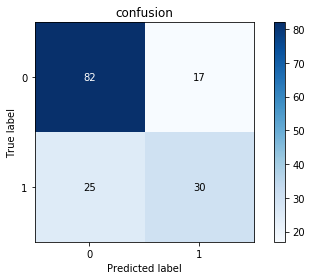

Precision: When it predicts yes, how often is it correct?: [0.76635514 0.63829787]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.82828283 0.54545455]
F1:score is the harmonic average of the precision and recall,: [0.7961165  0.58823529]
Accuracy.Overall, how often is the classifier correct?:  0.7272727272727273
Misclassification Rate.Overall, how often is it wrong?:  0.2727272727272727
Confusion matrix:
 [[85 14]
 [28 27]]
[0, 1]


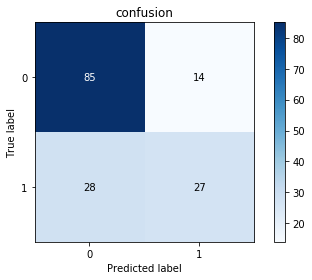

Precision: When it predicts yes, how often is it correct?: [0.75221239 0.65853659]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.85858586 0.49090909]
F1:score is the harmonic average of the precision and recall,: [0.80188679 0.5625    ]
Accuracy.Overall, how often is the classifier correct?:  0.7272727272727273
Misclassification Rate.Overall, how often is it wrong?:  0.2727272727272727
Confusion matrix:
 [[85 14]
 [29 26]]
[0, 1]


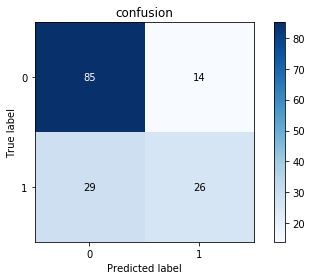

Precision: When it predicts yes, how often is it correct?: [0.74561404 0.65      ]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.85858586 0.47272727]
F1:score is the harmonic average of the precision and recall,: [0.79812207 0.54736842]
Accuracy.Overall, how often is the classifier correct?:  0.7207792207792207
Misclassification Rate.Overall, how often is it wrong?:  0.27922077922077926
Confusion matrix:
 [[90  9]
 [30 25]]
[0, 1]


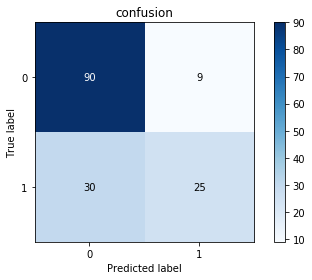

Precision: When it predicts yes, how often is it correct?: [0.75       0.73529412]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.90909091 0.45454545]
F1:score is the harmonic average of the precision and recall,: [0.82191781 0.56179775]
Accuracy.Overall, how often is the classifier correct?:  0.7467532467532467
Misclassification Rate.Overall, how often is it wrong?:  0.2532467532467533
Confusion matrix:
 [[89 10]
 [31 24]]
[0, 1]


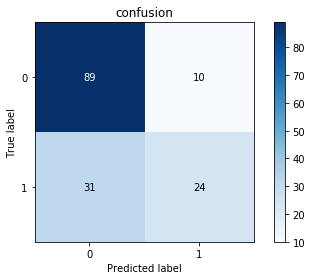

Precision: When it predicts yes, how often is it correct?: [0.74166667 0.70588235]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.8989899  0.43636364]
F1:score is the harmonic average of the precision and recall,: [0.81278539 0.53932584]
Accuracy.Overall, how often is the classifier correct?:  0.7337662337662337
Misclassification Rate.Overall, how often is it wrong?:  0.26623376623376627
Confusion matrix:
 [[89 10]
 [28 27]]
[0, 1]


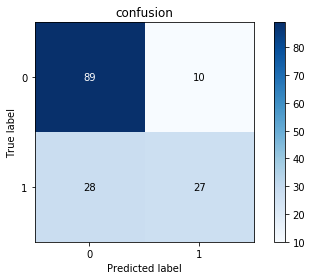

Precision: When it predicts yes, how often is it correct?: [0.76068376 0.72972973]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.8989899  0.49090909]
F1:score is the harmonic average of the precision and recall,: [0.82407407 0.58695652]
Accuracy.Overall, how often is the classifier correct?:  0.7532467532467533
Misclassification Rate.Overall, how often is it wrong?:  0.24675324675324672
Confusion matrix:
 [[91  8]
 [29 26]]
[0, 1]


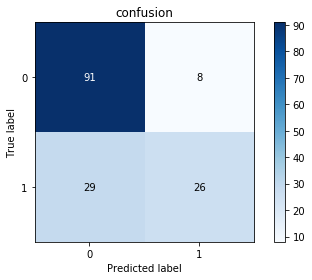

Precision: When it predicts yes, how often is it correct?: [0.75833333 0.76470588]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.91919192 0.47272727]
F1:score is the harmonic average of the precision and recall,: [0.83105023 0.58426966]
Accuracy.Overall, how often is the classifier correct?:  0.7597402597402597
Misclassification Rate.Overall, how often is it wrong?:  0.24025974025974028
Confusion matrix:
 [[90  9]
 [29 26]]
[0, 1]


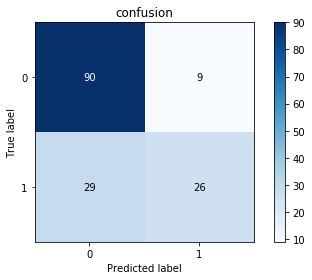

Precision: When it predicts yes, how often is it correct?: [0.75630252 0.74285714]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.90909091 0.47272727]
F1:score is the harmonic average of the precision and recall,: [0.82568807 0.57777778]
Accuracy.Overall, how often is the classifier correct?:  0.7532467532467533
Misclassification Rate.Overall, how often is it wrong?:  0.24675324675324672
Confusion matrix:
 [[91  8]
 [29 26]]
[0, 1]


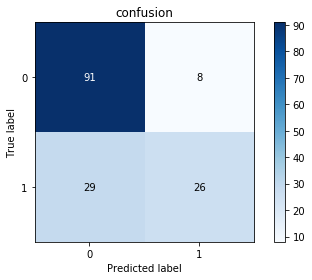

Precision: When it predicts yes, how often is it correct?: [0.75833333 0.76470588]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.91919192 0.47272727]
F1:score is the harmonic average of the precision and recall,: [0.83105023 0.58426966]
Accuracy.Overall, how often is the classifier correct?:  0.7597402597402597
Misclassification Rate.Overall, how often is it wrong?:  0.24025974025974028
Confusion matrix:
 [[90  9]
 [28 27]]
[0, 1]


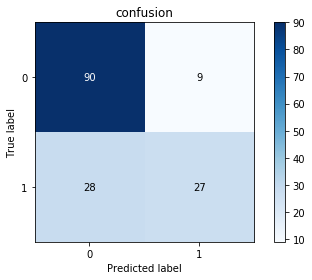

Precision: When it predicts yes, how often is it correct?: [0.76271186 0.75      ]
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: [0.90909091 0.49090909]
F1:score is the harmonic average of the precision and recall,: [0.82949309 0.59340659]
Accuracy.Overall, how often is the classifier correct?:  0.7597402597402597
Misclassification Rate.Overall, how often is it wrong?:  0.24025974025974028

 f1_scores:  [array([0.7961165 , 0.58823529]), array([0.80188679, 0.5625    ]), array([0.79812207, 0.54736842]), array([0.82191781, 0.56179775]), array([0.81278539, 0.53932584]), array([0.82407407, 0.58695652]), array([0.83105023, 0.58426966]), array([0.82568807, 0.57777778]), array([0.83105023, 0.58426966]), array([0.82949309, 0.59340659])]
accuracy:  [0.7272727272727273, 0.7272727272727273, 0.7207792207792207, 0.7467532467532467, 0.7337662337662337, 0.7532467532467533, 0.7597402597402597, 0.7532467532467533, 0.7597402597402597, 0.7597402597402597]
[0 0 0 0 0 0 

In [229]:
    #Call the KNN function
    f1_scores,accur,preci,recall,y_pred,y_prob=KNN(k,X_train,y_train,X_test,y_test)
    print(y_pred)
    print(y_prob)

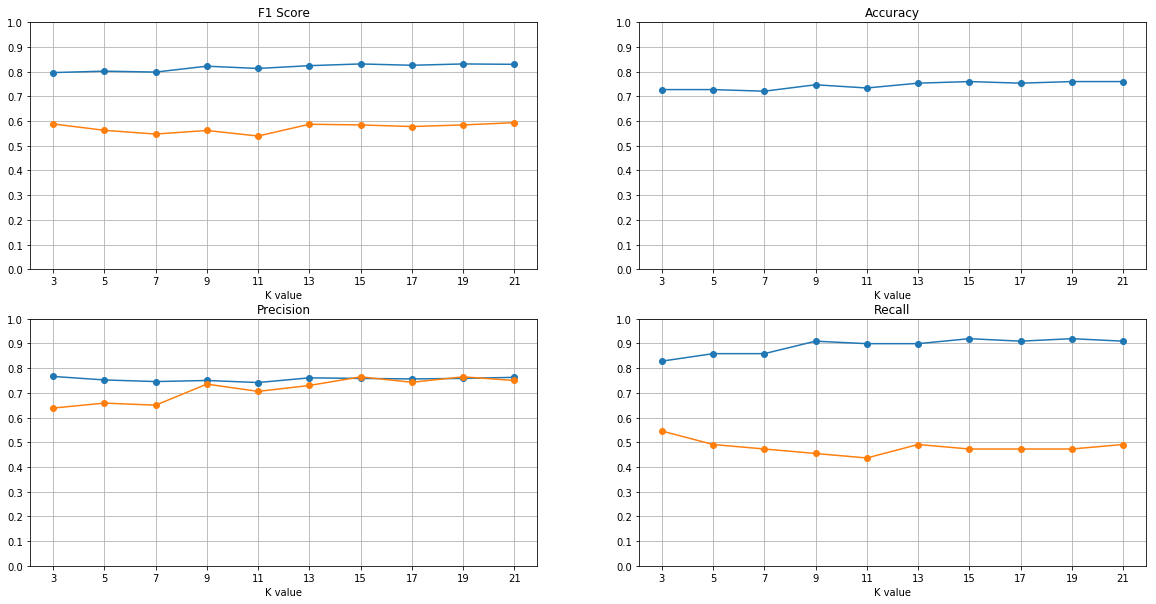

In [230]:
    #Plot the metrics
    plot_the_metrics(f1_scores,accur,preci,recall)
    

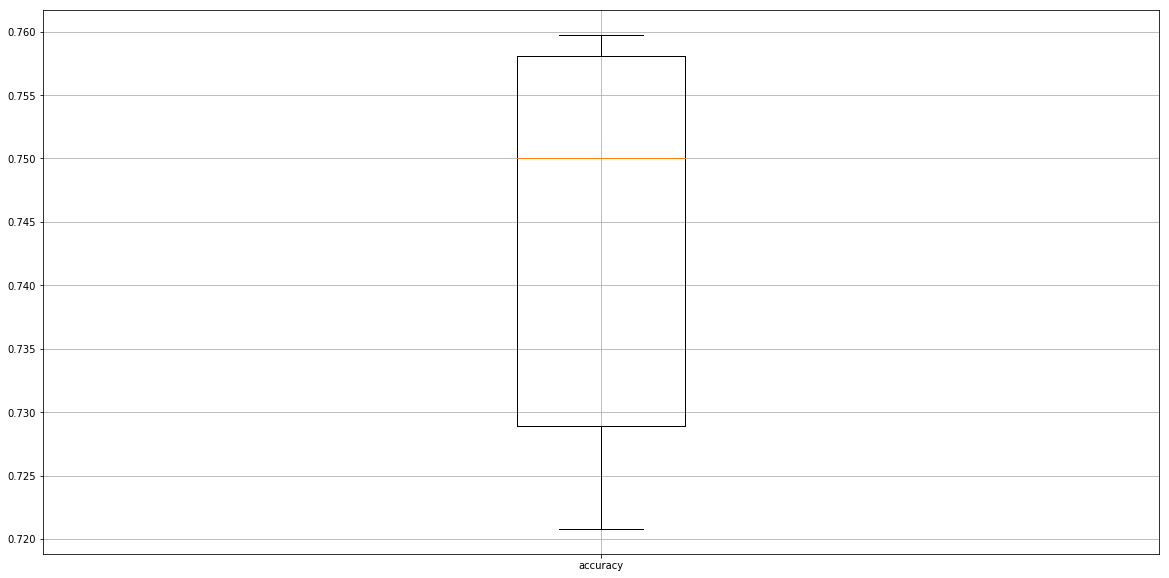

In [231]:
    #Box plot of the metrics
    box_plot_the_metrics(f1_scores,accur,preci,recall)

In [232]:
max_results(f1_scores,accur,preci,recall,k)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 4))



IndexError: index 12 is out of bounds for axis 0 with size 10

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.86525364 -0.03198993]
 [-1.20601255 -0.5283186 ]
 [ 2.01595708 -0.69376149]
 [-1.07450358 -0.5283186 ]
 [ 0.50360399 -2.67907616]]


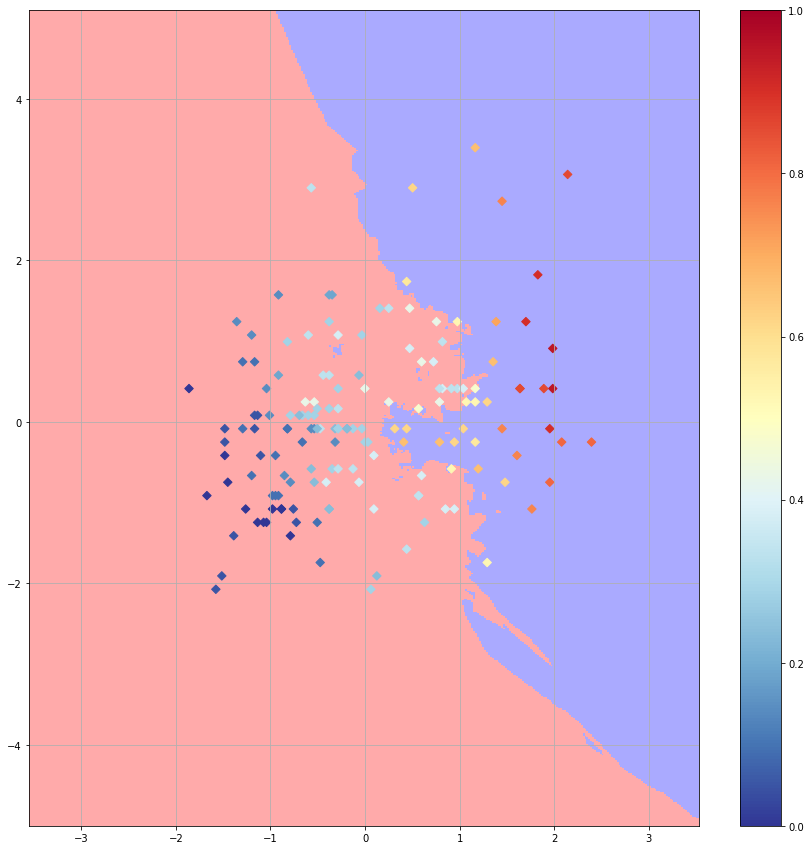

In [233]:
    #Plot the decision boundaries (for input vectors only)
    
    if (X.values.shape[1]==2):
        boundary_decision_plot(X,y,X_train,y_train,X_test,y_pred,y_prob)

In [ ]:
list(np.unique(dataset['Outcome']))

In [ ]:
f1_scores

In [ ]:
accur

In [ ]:
preci

In [ ]:
recall

In [ ]:
k